In [2]:
# import modules
import os # file 
import shutil
import cv2 # opencv for images
import random
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO #for obeject detection
import albumentations as A # for image augmentation
from albumentations.pytorch import ToTensorV2 # for image formating
import matplotlib.pyplot as plt

# Load Model and Model Names


In [16]:
# load pre trained model
model = YOLO("../models/yolov8n.pt")

class_names = model.names
print(model.names)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [13]:
# DRAWING METHODS

# Function to get class colors
def getColours(cls_num):
    base_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    color_index = cls_num % len(base_colors)
    increments = [(1, -2, 1), (-2, 1, -1), (1, -1, 2)]
    color = [base_colors[color_index][i] + increments[color_index][i] * 
    (cls_num // len(base_colors)) % 256 for i in range(3)]
    return tuple(color)


def drawPredictions(predictions, img): 
    for p in predictions:
        boxes = p.boxes
        for box in boxes:
            if box.conf[0] > 0.4:
                # get coordinates
                [x1, y1, x2, y2] = box.xyxy[0]
                # convert to int
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
                cls = int(box.cls[0]) # get the class index
        
                colour = getColours(cls)
        
                # draw prediction the rectangle
                cv2.rectangle(img, (x1, y1), (x2, y2), colour, 2)
        
                # put the class name and confidence on the image
                cv2.putText(img, f'{class_names[cls]} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)
                #cv2.putText(img, f'{classNames[int(box.cls[0])]} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)
                

# Get predictions from model

../datasets/images/train/-2544-_png_jpg.rf.13bfe27776b4d713faf93d42421ae13f.jpg

0: 640x640 5 persons, 1 tie, 68.7ms
Speed: 2.8ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


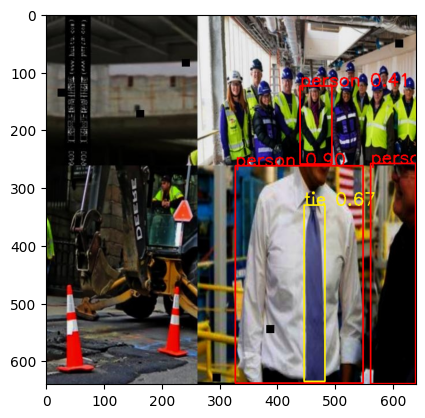

../datasets/images/train/-2544-_png_jpg.rf.185d1d1c0cb4027d76f7e31cd409022e.jpg

0: 640x640 3 persons, 1 tie, 1 fork, 64.7ms
Speed: 1.1ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


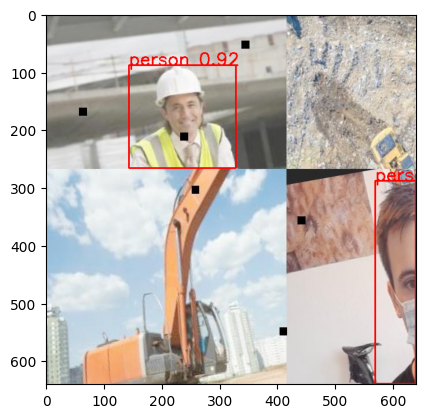

../datasets/images/train/-2544-_png_jpg.rf.1224ec786928243a0076833c5ddb34f4.jpg

0: 640x640 5 persons, 1 bus, 1 truck, 62.0ms
Speed: 1.5ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


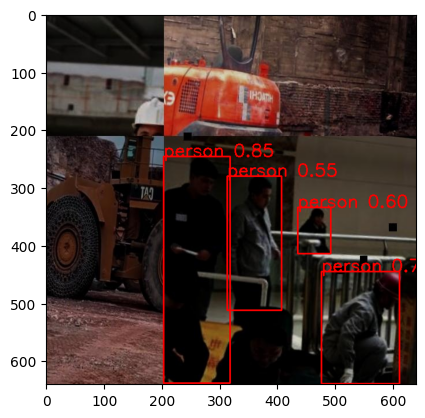

../datasets/images/train/616_jpg.rf.440e1d2885969b920d1115e4dd9c95d3.jpg

0: 640x640 6 persons, 1 horse, 1 sheep, 67.9ms
Speed: 1.8ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


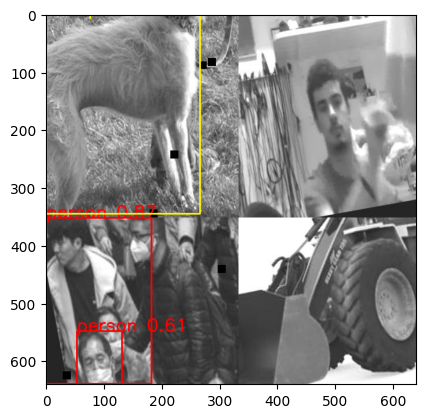

../datasets/images/train/2008_008600_jpg.rf.1e30fdd484a479256bd540cc92dc375b.jpg

0: 640x640 1 boat, 1 dog, 70.9ms
Speed: 1.3ms preprocess, 70.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


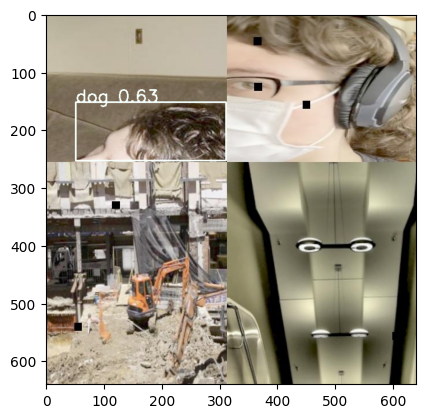

../datasets/images/train/2008_008618_jpg.rf.36f88cd9160d2a0be857a1f22210540b.jpg

0: 640x640 5 persons, 2 trains, 2 suitcases, 64.2ms
Speed: 1.5ms preprocess, 64.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


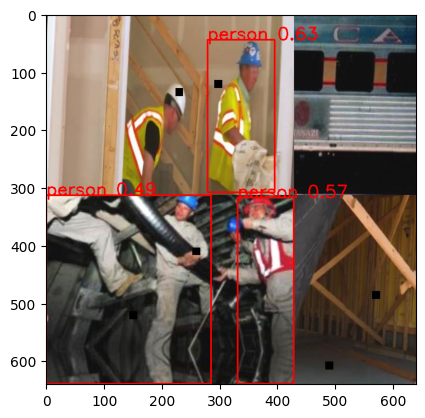

../datasets/images/train/2009_000280_jpg.rf.7c269bca3935b65ae9bf2d15593b9711.jpg

0: 640x640 1 person, 1 car, 1 boat, 62.1ms
Speed: 1.3ms preprocess, 62.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


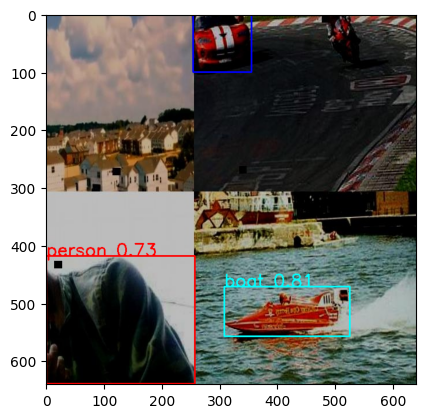

../datasets/images/train/amz_02354_png_jpg.rf.05804b93377b6f8d38b6e61553c4c129.jpg

0: 640x640 1 person, 1 train, 61.8ms
Speed: 1.7ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


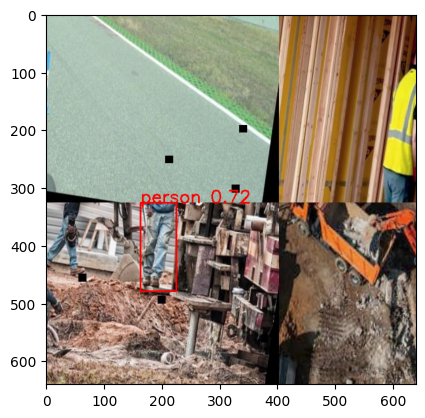

../datasets/images/train/autox6_mp4-80_jpg.rf.0cebdad4d9d8f205f998ceaad09ea576.jpg

0: 640x640 1 person, 1 truck, 62.7ms
Speed: 1.8ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


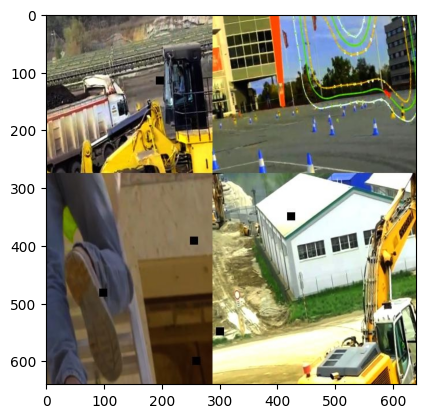

In [14]:
#Manually presenting annotations 

# train files
base_dir="../datasets/images/train/"

image_files=["-2544-_png_jpg.rf.13bfe27776b4d713faf93d42421ae13f.jpg", 
             "-2544-_png_jpg.rf.185d1d1c0cb4027d76f7e31cd409022e.jpg",
             "-2544-_png_jpg.rf.1224ec786928243a0076833c5ddb34f4.jpg",
            "616_jpg.rf.440e1d2885969b920d1115e4dd9c95d3.jpg",
            "2008_008600_jpg.rf.1e30fdd484a479256bd540cc92dc375b.jpg",
            "2008_008618_jpg.rf.36f88cd9160d2a0be857a1f22210540b.jpg",
            "2009_000280_jpg.rf.7c269bca3935b65ae9bf2d15593b9711.jpg",
            "amz_02354_png_jpg.rf.05804b93377b6f8d38b6e61553c4c129.jpg",
            "autox6_mp4-80_jpg.rf.0cebdad4d9d8f205f998ceaad09ea576.jpg"]

for path in image_files:
    # Open image file for reading and fix color grading
    file = base_dir + path
    print(file)
    img = cv2.imread(file) 
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # perform inference using YOLOv8
    results = model(img)
    
    drawPredictions(results, img)
    plt.imshow(img)
    plt.show()
